 # HRAttrition Analysis

 In the business world, companies often face the challenge of retaining talented
 employees. One of the most pressing issues is the increasing rate of employee
 turnover, commonly known as HR attrition. Turnover can have a significant impact on
 a company’s productivity, stability, and long-term sustainability. High attrition rates
can lead to increased recruitment and training costs, disrupt team dynamics, and
 result in the loss of valuable institutional knowledge. Therefore, understanding the
 factors contributing to attrition and implementing effective retention strategies is
 crucial for maintaining a competitive edge and ensuring
 Objectives of the Analysis
 1. Understand Current Turnover Rates: Gain a comprehensive understanding of
 the current employee tururnover rate and analyze the demographic distribution of
 attrition by age, gender, education, department, and job role.
 2. Identify Key Factors Influencing Turnover: Examine the main factors
 contributing to employee attrition, including job satisfaction indicators (job
 involvement and work-life balance), salary factors (monthly income and salary
 hikes), and benefit factors (stock option levels), to uncover patterns and
 correlations that drive higher attrition rates

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

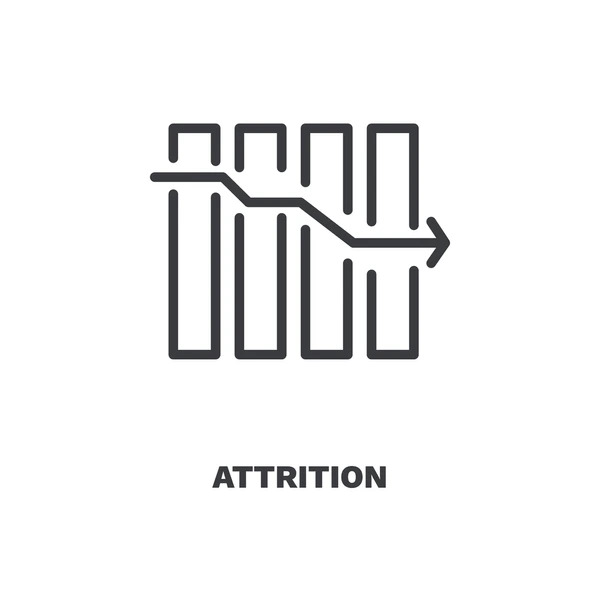

In [2]:
%matplotlib inline
from IPython.display import Image
Image(r"C:\Users\91931\Downloads\Images for projects\attrition-icon-thin-line-human-600nw-2273927939.jpg")

In [2]:
pd.set_option('display.max_columns', 35)

In [3]:
data = pd.read_csv(r"C:\Users\91931\Downloads\Intern\Dataset\HR-Employee-Attrition.csv")

In [4]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [5]:
data.shape

(1470, 35)

In [6]:
data.duplicated().sum()

np.int64(0)

In [7]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [9]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


So there are no apparent outliers, null or duplicates in dataset.


# Exploratory data analysis

 Attritionrate: The attrition rate measures the percent age of employees who leave the
 company in a given period of time. It is usually calculated with in a year and is
 expressed as a percentage of the total number of employees.

In [10]:
data['Attrition'].value_counts(normalize=True)

Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64

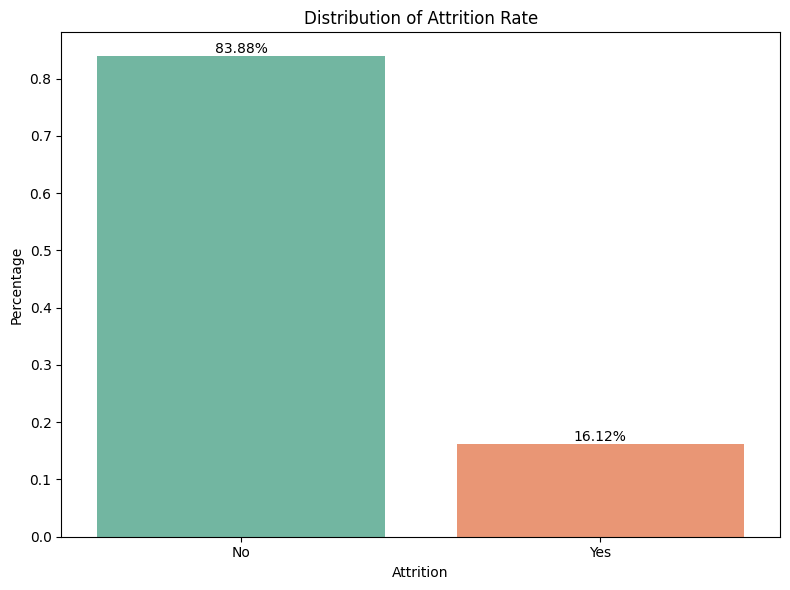

In [11]:
attrition = data['Attrition'].value_counts(normalize=True)

plt.figure(figsize=(8,6))
ax = sns.barplot(x=attrition.index, y=attrition,palette='Set2')
for p in ax.patches:ax.annotate(f'{p.get_height() * 100:.2f}%',
(p.get_x() + p.get_width() / 2.,p.get_height()),
ha='center', va='bottom')
plt.title('Distribution of Attrition Rate')
plt.xlabel('Attrition')
plt.ylabel('Percentage') 
plt.tight_layout()
plt.show()

Based on our analysis we can see that company's attrition rate is 16.2% which means about 16.2% of the employees have decided to leave the company.

Average tenure: The average tenure measures the average number of years an
employee stays with the company before leaving. It can provide insight into workforce
stability and employee satisfaction within the organization

In [12]:
mean = data['YearsAtCompany'].mean()
avg_tenure = round(mean,2)

print(f'Average years of employee to leave the company is :{avg_tenure} years')

Average years of employee to leave the company is :7.01 years


So, from the data we can see that the average tenure for the employees before they decided to leave is about 7.01 years, which can conclude that many employees feel comfortable working here and have been with the company for a long time.

# Employee's Demographics

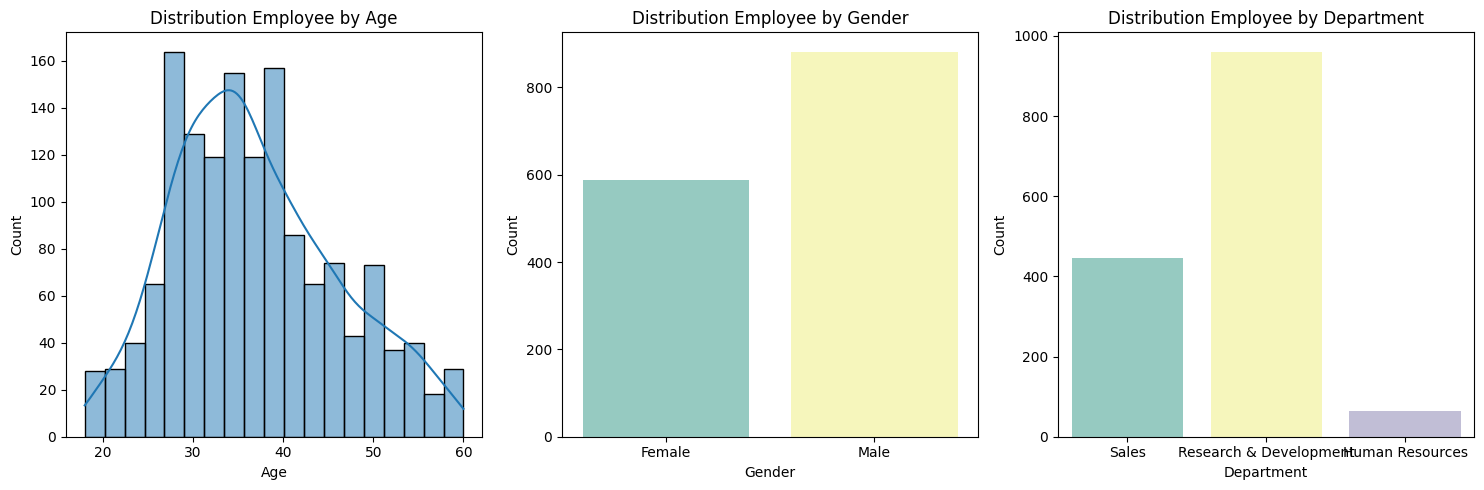

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
sns.histplot(data=data, x='Age', kde=True, ax=axes[0])
axes[0].set_title('Distribution Employee by Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')
sns.countplot(data=data, x='Gender', ax=axes[1], palette='Set3')
axes[1].set_title('Distribution Employee by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')
sns.countplot(data=data, x='Department', ax=axes[2], palette='Set3')
axes[2].set_title('Distribution Employee by Department')
axes[2].set_xlabel('Department')
axes[2].set_ylabel('Count')
plt.tight_layout()
plt.show()

# Conclusion

Age: Most of the company's employees are in the 29-39 age group. This
 indicates that the company has many employees who are at a productive and
 experienced age.

Gender: The majority of employees at this company are male. There are
 significantly more male employees than female employees.
 
Department: Most of the company's employees are concentrated in the
 research and development department. This indicates that the company is
 heavily focused on product or service research and development activities.


In [14]:
data_attrition = data[data['Attrition'] == 'Yes']

In [15]:
data_attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,19,3,Male,50,2,1,Laboratory Technician,3,Single,2028,12947,5,Y,Yes,14,3,2,80,0,6,4,3,4,2,0,3
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,27,3,Male,82,2,1,Sales Representative,1,Single,3407,6986,7,Y,No,23,4,2,80,0,10,4,3,5,3,0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,1,31,2,Male,83,3,1,Research Scientist,1,Single,2960,17102,2,Y,No,11,3,3,80,0,8,2,3,4,2,1,3


In [16]:
# Make a new function called calculation attrition rate
def calculate_attrition_rate(data,column):
  attrition_counts = data.groupby([column,'Attrition']).size().unstack(fill_value=0)
  attrition_rate = attrition_counts['Yes'] / attrition_counts.sum(axis=1) * 100
  attrition_rate_data = attrition_rate.reset_index()
  attrition_rate_data.columns = [column, 'AttritionRate']
  return attrition_rate_data

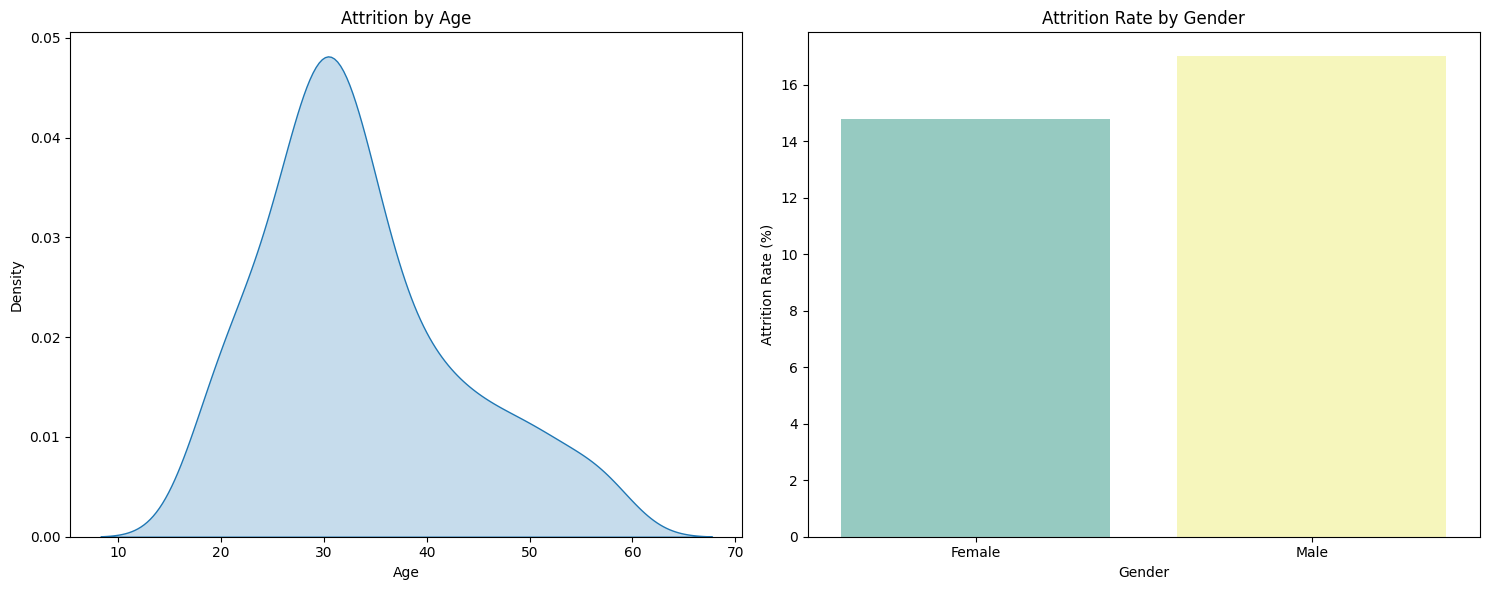

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))

# Plot 1: KDE plot of Age with Attrition hue

sns.kdeplot(data=data_attrition, x='Age', fill=True, ax=axes[0])
axes[0].set_title('Attrition by Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Density')

 # Plot 2: Bar plot of Gender count with Attrition hue
 
attrition_rate_data = calculate_attrition_rate(data, 'Gender')
sns.barplot(data=attrition_rate_data, x='Gender',
y='AttritionRate', ax=axes[1], palette='Set3')
axes[1].set_title(f'Attrition Rate by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Attrition Rate (%)')
plt.tight_layout()
plt.show()